<a href="https://colab.research.google.com/github/kiananasiri/PRODIGY_ML_03/blob/main/Cats_vs_Dogs_Img.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download from Kaggle
----------------

In [1]:
!mkdir ~/.kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kiananasiri","key":"d16e64411b41399a6286d54d7e782d60"}'}

In [3]:
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c dogs-vs-cats

100% 809M/812M [00:03<00:00, 264MB/s]
100% 812M/812M [00:03<00:00, 264MB/s]


In [5]:
!unzip /content/dogs-vs-cats.zip

Archive:  /content/dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


Unzip
----------

Model
---------

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
%matplotlib inline

In [8]:
import os
from PIL import Image
from IPython.display import display

# Filter harmless warnings
import warnings
warnings.filterwarnings("ignore")

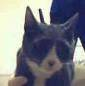

In [9]:
with Image.open('/content/train/train/cat.10107.jpg') as im:
    display(im)

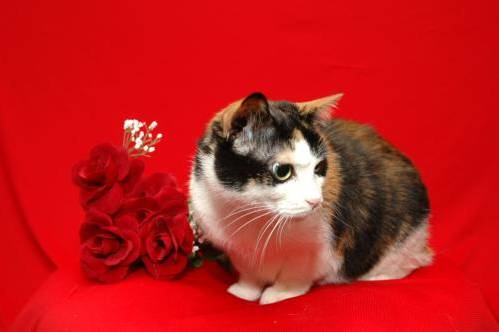

In [10]:
with Image.open('/content/train/train/cat.777.jpg') as im:
  display(im)

In [11]:
samplesub = pd.read_csv('/content/sampleSubmission.csv')

labeling
-----------

In [12]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread

In [13]:
path = 'train/train'
img_names = []
flatten_data = []
#target_labels = []

for folder, subfolders, filenames in os.walk(path):
    for img in filenames:
        img_names.append(folder+'/'+img)


print('Images: ',len(img_names))

Images:  25000


In [14]:
img_names[0]

'train/train/dog.1637.jpg'

labels pattern :

- cat -> 0

- dog -> 1

In [15]:
target_labels = [0 if filename[12:15] == 'cat' else 1  for filename in img_names]

In [16]:
img_names[:5] , target_labels[:5]

(['train/train/dog.1637.jpg',
  'train/train/dog.7889.jpg',
  'train/train/dog.6727.jpg',
  'train/train/cat.9977.jpg',
  'train/train/cat.3975.jpg'],
 [1, 1, 1, 0, 0])

In [17]:
from collections import Counter
Counter(target_labels)

Counter({1: 12500, 0: 12500})

In [35]:
subsample_img_names = img_names[:500]

In [36]:
flatten_data = []

for img in subsample_img_names:
        img_array = imread(img)
        img_resized = resize(img_array,(64,64,3))
        flatten_data.append(img_resized.flatten())

In [37]:
flat_data=np.array(flatten_data)
target=np.array(target_labels)

df=pd.DataFrame(flat_data)
df['Target']=target[:500]
df.shape

(500, 12289)

In [38]:
#df.to_csv('Flatten_subSample.csv' , index=False)

In [39]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [40]:
x.shape , y.shape

((500, 12288), (500,))

In [41]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

param_grid={'C':[0.1,1,10,100],
            'gamma':[0.0001,0.001,0.1,1],
            'kernel':['rbf','poly'] }
svc=svm.SVC(probability=True)
model=GridSearchCV(svc,param_grid)

In [42]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)
print('Splitted Successfully')
print(x_train.shape , x_test.shape)
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
# model.best_params_ contains the best parameters obtained from GridSearchCV

Splitted Successfully
(350, 12288) (150, 12288)
The Model is trained well with the given images


In [43]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
y_pred=model.predict(x_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y_test))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The predicted Data is :
[1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1
 1 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0
 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1
 1 1]
The actual data is:
[1 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1
 1 1 0 0 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0
 1 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0
 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0
 1 0]
The model is 59.333333333333336% accurate


In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_pred , y_test))

              precision    recall  f1-score   support

           0       0.51      0.60      0.55        63
           1       0.67      0.59      0.63        87

    accuracy                           0.59       150
   macro avg       0.59      0.59      0.59       150
weighted avg       0.60      0.59      0.60       150

